In [1]:
import numpy as np
import pandas as pd
import os
import os.path
import datetime
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import plotly.offline as py
!pip install cufflinks
import cufflinks as cf
!pip install plotly==4.9.0
import plotly.graph_objects as go

In [ ]:
#MODELO SIR PARA VARIOS BETA Y GAMMA

In [8]:
valores = [(0.15, 1/14),(0.05, 1/45)]

t=np.linspace(0, 165, 165)

def modelo_SIR(beta,gamma):
    N=100000
    I0, R0=1, 0
    S0=N - I0 - R0
    
    # Las ecuaciones diferenciales del modelo SIR
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    # Vector de las condiciones iniciales
    y0 = S0, I0, R0
    # Resolver el sistema de ecuaciones diferenciales, en la secuencia de días que ya definimos
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    return (I)

   

py.iplot([{
    'x': t,
    'y': modelo_SIR(*valor),
    'name': str(valor),
}  for valor in valores], filename='cufflinks/multiple-lines-on-same-chart')

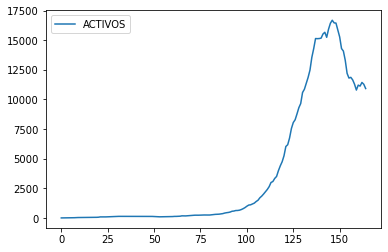

In [5]:
#DataFrame de la ciudad de Medellín
dfmedellin = pd.read_csv(os.path.join('../Output', 'data_medellin.csv'))
dfmedellin_activos = dfmedellin[['FECHA','ACTIVOS']]
#dfmedellin_activos
dfmedellin_activos.plot()